In [1]:
from instapipeline import util
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from skimage.io import imread
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
img_filename = 'C2-ISP_293T_TFRC_InSituPrep_20180712_1_MMStack_Pos0_700.png'
img_filepath = './datasets/images/smfish.png'
ref_filepath = './datasets/ref/smFISH_ref.csv'

In [3]:
def get_nnd(coord, kdt):
    dist, ind = kdt.query([coord], k=2)
    return dist[0][1]

In [4]:
im = imread(img_filepath)
img_width, img_height = im.shape

In [5]:
crosshair_arm_to_image_width_ratio = 0.03045
crosshair_arm_length = crosshair_arm_to_image_width_ratio * img_width
kdt = util.csv_to_kdt(ref_filepath, img_height)

In [6]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

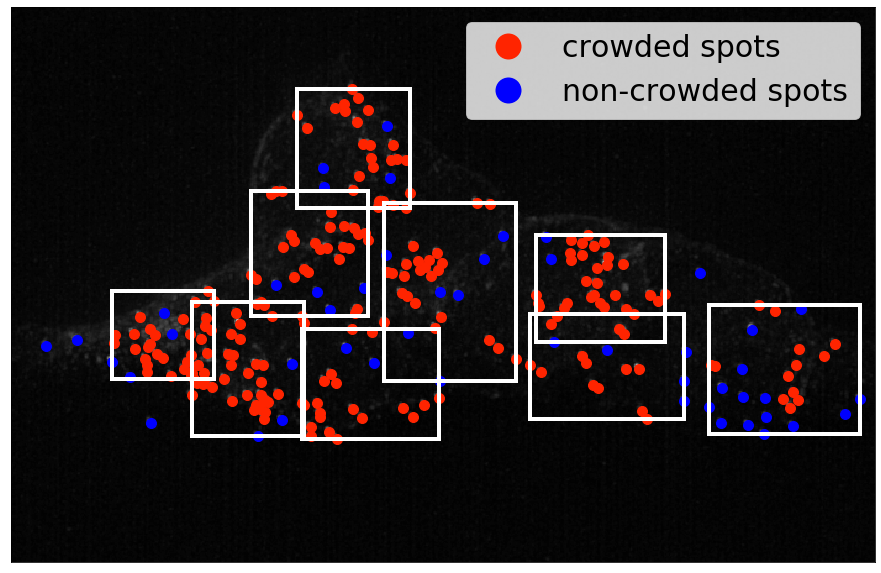

In [7]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(1)

plt.imshow(im, cmap='gray')
set_size(12,14)
markersize=100

coords = kdt.data
for coord in coords:
    nnd = get_nnd(coord, kdt)
    if nnd < crosshair_arm_length:
        ax.scatter(coord[0], [img_height-coord[1]], facecolors='#FF2400', s=markersize)
    else:
        ax.scatter(coord[0], [img_height-coord[1]], facecolors='b', s=markersize)    

handle1 = Line2D([0],[0], marker='o', color='None', markerfacecolor='#FF2400', markeredgecolor='None', label='crowded spots', markersize=26)
handle2 = Line2D([0],[0], marker='o', color='None', markerfacecolor='b', markeredgecolor='None', label='non-crowded spots', markersize=26)
legend = plt.legend(handles=[handle1, handle2], loc='upper right', frameon=1, prop={'size': 30})
frame = legend.get_frame()
frame.set_facecolor('white')

for i in range(9):
    csv_path = './datasets/bounding_boxes/smfish_%s.csv' % i
    crop = np.genfromtxt(csv_path, delimiter=',')
    rect = Rectangle((crop[0], crop[2]), crop[1]-crop[0], crop[3]-crop[2], edgecolor='w', facecolor='none', linewidth=4)
    ax.add_patch(rect)

plt.xticks([])
plt.yticks([])
plt.savefig("crowded_spots_detected_and_bound.pdf", transparent=True, bbox_inches="tight")
plt.show()
